In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import calendar
from itertools import combinations
from collections import Counter

#### Merge data of 12 files into one file

In [131]:
# Path to your CSV files
path = "./"  # Current directory of Jupyter Notebook

# Use glob to find files matching your pattern
csv_files = glob.glob(path + "Sales_*.csv")

# List to store DataFrames
df_list = []

# Read each file and append to list
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Concatenate all DataFrames
master_df = pd.concat(df_list, ignore_index=True)

In [132]:
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [133]:
master_df['Order_Month'] = master_df['Order Date'].str[0:2]

#### Remove NaN, non-numeric values and change datatype for Order_Month Column

In [135]:
master_df[master_df['Order_Month'].isnull()==1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping NaN rows and handling non numeric values

In [136]:
master_df = master_df.dropna(subset=['Order_Month'])

In [137]:
master_df[~master_df['Order_Month'].str.isnumeric()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [138]:
master_df = master_df[master_df['Order_Month'].str.isnumeric()]

In [139]:
master_df['Order_Month'] = master_df['Order_Month'].astype('int')

In [140]:
master_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Order_Month          int64
dtype: object

#### Handling NaN values and correcting datatypes 

In [141]:
master_df = master_df.dropna(how='all')

In [142]:
master_df.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
Order_Month         False
dtype: bool

In [143]:
master_df = master_df.astype({'Quantity Ordered':'int','Price Each':'float'})

In [144]:
master_df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Order_Month           int64
dtype: object

In [145]:
master_df['Total_Sales'] = master_df['Quantity Ordered']*master_df['Price Each']

#### Question1: What was the best month for sales? How much was the sales that month?

In [146]:
master_df.groupby('Order_Month')['Total_Sales'].sum().reset_index().sort_values(by='Total_Sales',ascending=False)

,Order_Month,Total_Sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42


In [147]:
sales_by_month = master_df.groupby('Order_Month').sum()

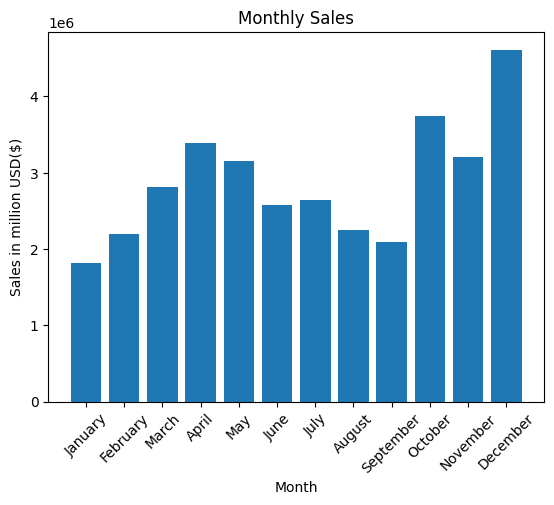

In [148]:
# Get month names for the x-axis
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plot the bar chart
x = range(1, 13)  # Months as numbers
plt.bar(x, sales_by_month['Total_Sales'])
plt.xticks(x, month_names, rotation=45)  # Set x-axis labels to month names
plt.ylabel('Sales in million USD($)')
plt.xlabel('Month')
plt.title('Monthly Sales')
plt.show()

#### December had the highest sales with $4613443.34

#### Question2:Which city had the highest sales?

In [149]:
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Total_Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [150]:
master_df['Purchase Address'].str.split(',').apply(lambda x: f"{x[1].strip()} ({x[2].split()[0]})")

0         New York City (NY)
1         New York City (NY)
2         New York City (NY)
3         San Francisco (CA)
4               Atlanta (GA)
                 ...        
186845           Boston (MA)
186846    New York City (NY)
186847    San Francisco (CA)
186848    San Francisco (CA)
186849          Atlanta (GA)
Name: Purchase Address, Length: 185950, dtype: object

In [227]:
# Creating new 'City' column
master_df['City'] = master_df['Purchase Address'].str.split(',').apply(lambda x: f"{x[1].strip()} ({x[2].split()[0]})")

In [226]:
# Calculation Sales for each city and sorting in descending order
sales_per_city = master_df.groupby('City')['Total_Sales'].sum().reset_index()
sales_per_city.sort_values(by = 'Total_Sales', ascending=False)

,City,Total_Sales
8,San Francisco (CA),8262203.91
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
2,Boston (MA),3661642.01
0,Atlanta (GA),2795498.58
3,Dallas (TX),2767975.40
9,Seattle (WA),2747755.48
7,Portland (OR),1870732.34
1,Austin (TX),1819581.75
6,Portland (ME),449758.27


##### San Francisco has the highest sales with $8262203.91

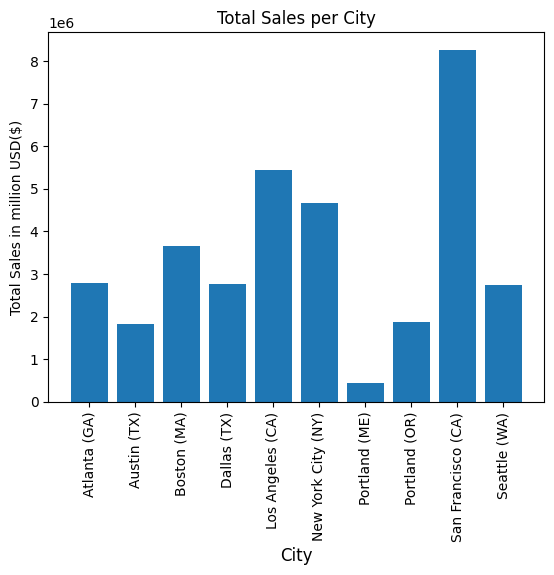

In [154]:
plt.bar(sales_per_city['City'], sales_per_city['Total_Sales'])
plt.xlabel('City', size=12)
plt.ylabel('Total Sales in million USD($)')
plt.title('Total Sales per City')
plt.xticks(rotation='vertical', size=10)
plt.show()

#### Question3: What time should we display advertisements to maximize likelihood of customer's buying products?

In [228]:
# Standardizing Order Date column
master_df['Order Date'] = pd.to_datetime(master_df['Order Date'], format='%Y-%m-%d %H:%M:%S')

In [229]:
# Creating new 'Hour' column to help figure out the best time during the day for displaying advertisements
master_df['Hour'] = master_df['Order Date'].dt.hour

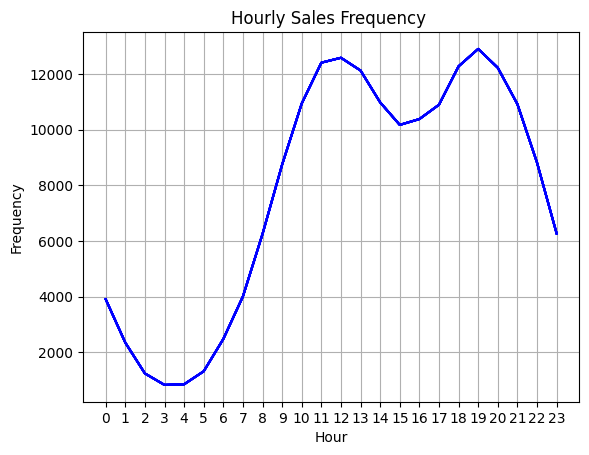

In [164]:
hours = [hour for hour, master_df in master_df.groupby('Hour')]
plt.plot(hours, master_df.groupby(['Hour']).count(), color='blue')
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Hourly Sales Frequency ')
plt.grid()
plt.show()

#### Advertisements should be targeted between 10 AM to 12 PM to catch the buildup to peak sales at noon.
#### A second window for advertisements should be between 5 PM to 7 PM to leverage the evening peak.

In [165]:
# Filter for Viewing Sales for a particular City
# ny_df = master_df[master_df['City' == 'New York City (NY)']]
# plt.plot(hours, ny_df.groupby(['Hour']).count(), color='blue')
# plt.xticks(hours)
# plt.xlabel('Hour')
# plt.ylabel('Frequency')
# plt.title('Hourly Sales Frequency ')
# plt.grid()
# plt.show()

In [166]:
# Filter for Viewing Sales for a particular State
# master_df['State'] = master_df['City'].str.extract(r'\(([^)]+)\)')
# master_df.head()
# california_state_df = master_df[master_df['State']=='CA']
# california_state_df.head()
# plt.plot(hours, california_state_df.groupby(['Hour']).count(), color='blue')
# plt.xticks(hours)
# plt.xlabel('Hour')
# plt.ylabel('Frequency')
# plt.title('Hourly Sales Frequency in California')
# plt.grid()
# plt.show()
# df = df.drop(columns = 'State')

#### Question4: What products are often sold together?

In [230]:
# Eliminating duplicates and grouping products sold together
st_df = master_df[master_df['Order ID'].duplicated(keep=False)]
st_df['Purchased_Together'] = master_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
st_df = st_df[['Order ID', 'Purchased_Together']].drop_duplicates()
st_df.head()

/var/folders/yr/cj7k88856rd57cfjp28z6rx40000gn/T/ipykernel_1236/4098647469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_df['Purchased_Together'] = master_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Purchased_Together
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [231]:
# Displaying products purchased together and count of the same
count = Counter()

for row in st_df['Purchased_Together']:
    ls = row.split(',')
    count.update(Counter(combinations(ls, 2)))

for key,value in count.most_common(5):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


#### Question5: Which was the most popular product? Why is that the case?

In [232]:
# Grouping products based on popularity
product_demand = master_df.groupby('Product')['Quantity Ordered'].sum().reset_index()
product_demand.sort_values(by='Quantity Ordered',ascending=False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


In [233]:
# If there are more than one product with the same demand
#most_popular = product_demand['Quantity Ordered'].max()
#most_popular_products = product_demand[product_demand['Quantity Ordered'] == most_popular]
#print(most_popular_products)

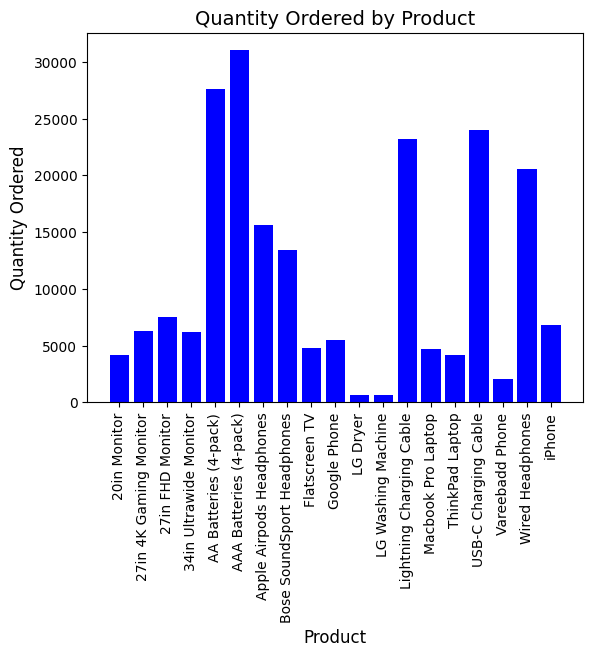

In [235]:
plt.bar(product_demand['Product'], product_demand['Quantity Ordered'], color='blue')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.title('Quantity Ordered by Product', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

AAA Batteries (4-pack) were ordered the most ordered i.e,31017 times

#### Hypothesis: Lower the price of the product, higher is the demand. Let's test this hypothesis by figuring out the correlation between the price of each of these products and the number of times they were ordered.

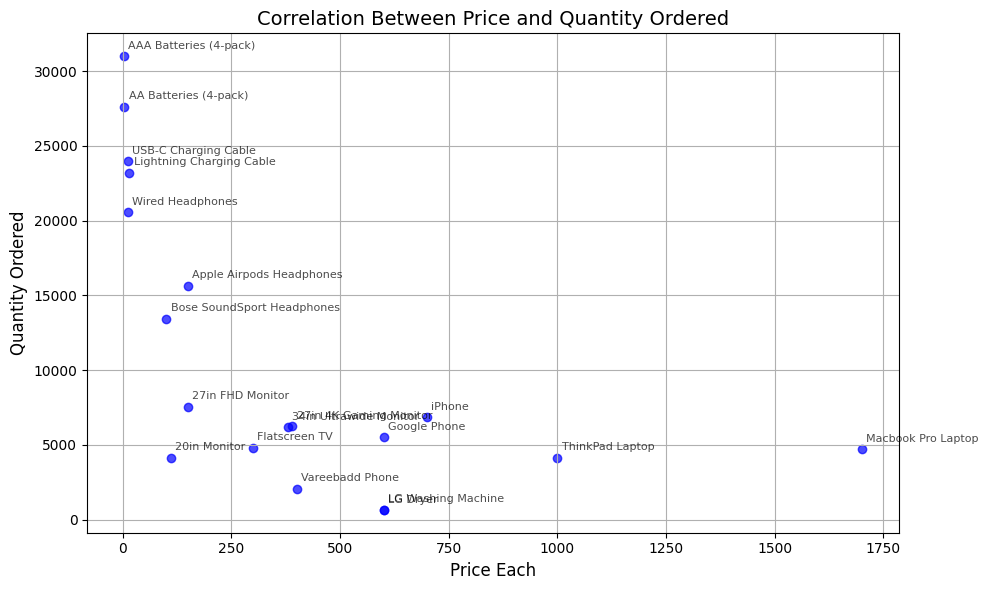

In [236]:
# Group the data to calculate average Price Each and total Quantity Ordered
price_quantity = master_df.groupby('Product').agg({'Price Each': 'mean', 'Quantity Ordered': 'sum'}).reset_index()

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(price_quantity['Price Each'], price_quantity['Quantity Ordered'], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Price Each', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.title('Correlation Between Price and Quantity Ordered', fontsize=14)

# Add product labels to the points
for i in range(len(price_quantity)):
    plt.text(price_quantity['Price Each'][i]+10, price_quantity['Quantity Ordered'][i]+500, 
             price_quantity['Product'][i], fontsize=8, alpha=0.7)

plt.grid()
plt.tight_layout()
plt.show()

##### The above graphs states that Lower-priced products are generally sold in larger quantities. Higher-priced products see lower sales volumes.

##### Let's check the correlation between price each and quantity ordered to determine how strong this hypothesis is.

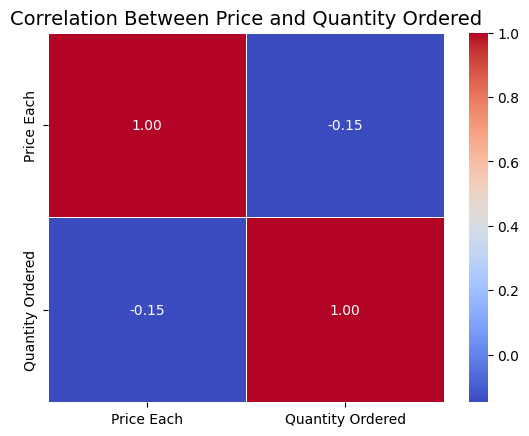

In [224]:
# Select relevant numerical columns for correlation
correlation_data = master_df[['Price Each', 'Quantity Ordered']]
correlation_matrix = correlation_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Price and Quantity Ordered', fontsize=14)
plt.show()

In [237]:
# Calculate the correlation coefficient between 'Price Each' and 'Quantity Ordered'
correlation_coefficient = master_df[['Price Each', 'Quantity Ordered']].corr().iloc[0, 1]

print(f"The correlation coefficient between Price Each and Quantity Ordered is: {correlation_coefficient:.2f}")

The correlation coefficient between Price Each and Quantity Ordered is: -0.15


#### The weak negative correlation (-0.15) indicates that lower prices are associated with higher quantities sold, but the relationship is not strong.This suggests that while price plays a role in influencing demand, it is not the sole or dominant factor.